In [80]:
#This code is written on Jupyter Notebook Version jupyter==1.0.0
# Using Following Packages 
# pandas==0.22.0
# numpy==1.12.1
# matplotlib==2.1.1
# seaborn==0.8.1



In [81]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv("companies.txt", chunksize=1,sep='\t', header=None)
df = pd.concat(df, ignore_index=True)



Assuming companies data is tab seprated.

In [83]:
df

,0,1,2,3,4,5,6,7,8,9
0,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
1,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
2,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
5,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
6,/Organization/01Games-Technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN
7,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997
8,/Organization/0Xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011
9,/Organization/1,One Inc.,http://whatis1.com,Mobile,operating,USA,CA,SF Bay Area,San Francisco,01-08-2011


In [84]:
df.columns=df.iloc[0]
df.drop(df.index[[0]], inplace=True)


In [85]:
df["permalink"]=df["permalink"].apply(lambda name:name.decode('unicode_escape').encode('ascii','ignore').lower())
companies=df


In [86]:


rounds2=pd.read_csv("rounds2.csv")
rounds2["company_permalink"]=rounds2["company_permalink"].apply(lambda name: name.decode('unicode_escape').encode('ascii','ignore').lower())
rounds2=rounds2

# rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

Checkpoint 1 started 

In [87]:
master_frame=pd.merge(rounds2,companies, how='left', left_on='company_permalink',right_on='permalink')
master_frame.shape,rounds2.shape,companies.shape
# master_frame

((114949, 16), (114949, 6), (66368, 10))

In [88]:


unique_companies=len(companies.permalink.unique())
unique_companies # in companies dataframe

66368

In [89]:
# How many unique companies are present in rounds2?

rounds2.company_permalink.unique().size

66368

In [90]:

# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

companies[~companies.permalink.isin(list(rounds2.company_permalink))]
# no

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [91]:
# Merge the two data frames so that all variables (columns) in the companies frame are added to 
# the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?
row,col=master_frame.shape
row,col


(114949, 16)

Checkpoint 1 ended here


In [92]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)



In [93]:
countries=["Botswana","Cameroon","Ethiopia","Eritrea","Gambia","Ghana","Kenya","Lesotho","Liberia","Malawi","Mauritius","Namibia","Nigeria","Rwanda","Seychelles","Sierra Leone","South Africa","South Sudan","Sudan","Swaziland","Tanzania","Uganda","Zambia","Zimbabwe","Antigua and Barbuda","Bahamas","Barbados","Belize","Canada","Dominica","Grenada","Guyana","Jamaica","Saint Kitts and Nevis","Saint Lucia","Saint Vincent and the Grenadines","Trinidad and Tobago","United States","India","Pakistan","Philippines","Singapore","Australia","Fiji","Kiribati","Marshall Islands","Federated States of Micronesia","Nauru","New Zealand","Palau","Papua New Guinea","Samoa","Solomon Islands","Tonga","Tuvalu","Vanuatu","Ireland","Malta","United Kingdom"]

#English Speaking Countries from pdf file
len(countries)

59

In [94]:

countries_df=pd.read_csv("all_countries.csv")
english_speaking_countries=pd.DataFrame({"name":countries})
english_speaking_countries_with_code=pd.merge(english_speaking_countries,countries_df[['alpha-3','name']], how='left', on='name')


In [95]:
data_of_english_speaking_countries=master_frame[master_frame.country_code.isin(list(english_speaking_countries_with_code["alpha-3"]))]
# data_of_english_speaking_countries

Checkpoint 2 Started

In [96]:
selected_four_investment_type=data_of_english_speaking_countries[data_of_english_speaking_countries.funding_round_type.isin(["venture","angel","seed","private_equity"])]
investment_amount_avg=selected_four_investment_type.groupby("funding_round_type")[["raised_amount_usd"]].mean().sort_values("raised_amount_usd", axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
investment_amount_avg
# from data below best suited investment type for spark funds is venture type
# selected_four_investment_type.shape

,raised_amount_usd
funding_round_type,
private_equity,62332471.55
venture,11540766.02
angel,855074.97
seed,821050.88


Venture Type is most suitable for spark funds

In [97]:

selected_four_investment_type[selected_four_investment_type.funding_round_type=="venture"].describe()
# Checking venture 
# Most sutailble type

,raised_amount_usd
count,41053.00
mean,11540766.02
std,93945470.37
min,0.00
25%,1600000.00
50%,5000000.00
75%,12000000.00
max,17600000000.00


In [98]:
top_countries=data_of_english_speaking_countries[data_of_english_speaking_countries\
                                                 .funding_round_type=="venture"]\
                                                 .groupby(["country_code"])[["raised_amount_usd"]]\
                                                 .sum().sort_values("raised_amount_usd",\
                                                  axis=0, ascending=False,  \
                                                  na_position='last').reset_index()
top_nine_countries=top_countries.head(9)

top_nine_countries=pd.merge(top_nine_countries,countries_df,how='left', left_on='country_code',right_on='alpha-3')
top_nine_countries[["country_code","name","raised_amount_usd"]]

# most investments are occurring
# top_nine_countries


,country_code,name,raised_amount_usd
0,USA,United States,422510842796.00
1,GBR,United Kingdom,20245627416.00
2,IND,India,14391858718.00
3,CAN,Canada,9583332317.00
4,SGP,Singapore,2793917856.00
5,IRL,Ireland,1676131350.00
6,AUS,Australia,1322934948.00
7,NZL,New Zealand,448316383.00
8,NGA,Nigeria,245440000.00


In [99]:
mapping=pd.read_csv("mapping.csv")
mapping["category_list"]=mapping["category_list"].fillna("NaN").apply(lambda n: n.replace("0","n").lower().decode('unicode_escape').encode('ascii','ignore'))
mapping["category_list"]=mapping["category_list"].apply(lambda n :n.replace("anlytics","analytics")\
                                                        .replace("finnce","finance").\
                                                        replace("finncial","financial").replace("nnotechnology","nanotechnology").\
                                                       replace("ntural","natural").
                                                       replace("mangement","management").
                                                       replace("educationl","educational").
                                                       replace("alterntive","alternative").
                                                       replace("journlism","journalism").
                                                       replace("personlization","personalization").
                                                       replace("cannbis","cannabis").
                                                       replace("nvigation","navigation").
                                                       replace("signge","signage").
                                                       replace("personl","personal").
                                                       replace("professionl","professional").
                                                       replace("governnce","governance"))

#In some placecs 0 is there insted of n
# mapping["category_list"]=mapping["category_list"].replace({"anlytics":"analytics"})
# mapping[mapping.category_list=="analytics"]
# mapping.category_list.unique()

all_col=mapping.columns[1:]
master_mapping_category=[]
for index,data in mapping.iterrows():
    temp=dict()
    for i,d in enumerate(data[1:len(data)]):
        temp["category_list"]=data[0]
        if d == 1:
            temp["main_sector"]=all_col[i]
    master_mapping_category.append(temp)

master_mapping=pd.DataFrame(master_mapping_category)




In [100]:
selected_funding_type_data=data_of_english_speaking_countries[data_of_english_speaking_countries.funding_round_type=="venture"]
selected_funding_type_data["primary_sector"]=selected_funding_type_data["category_list"]\
                                                .fillna("NaN").apply(lambda d:d.split("|")[0].lower().decode('unicode_escape').encode('ascii','ignore'))
top3_countries_with_primary_cat=selected_funding_type_data
# k=list(top3_countries_with_primary_cat.primary_category.unique())



/home/user-14/venvs/notebook/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [101]:
# mapping
master_mapping_frame=pd.merge(top3_countries_with_primary_cat,master_mapping,left_on="primary_sector",right_on="category_list",how='left')
del master_mapping_frame["category_list_y"]

In [102]:
# Checkpoint 4
master_mapping_frame[["company_permalink","name","category_list_x","primary_sector","main_sector"]]

,company_permalink,name,category_list_x,primary_sector,main_sector
0,/organization/-fame,#fame,Media,media,Entertainment
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,application platforms,"News, Search and Messaging"
2,/organization/004-technologies,004 Technologies,Software,software,Others
3,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,biotechnology,Cleantech / Semiconductors
4,/organization/0xdata,H2O.ai,Analytics,analytics,"Social, Finance, Analytics, Advertising"
5,/organization/0xdata,H2O.ai,Analytics,analytics,"Social, Finance, Analytics, Advertising"
6,/organization/0xdata,H2O.ai,Analytics,analytics,"Social, Finance, Analytics, Advertising"
7,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,apps,"News, Search and Messaging"
8,/organization/10-minutes-with,10 Minutes With,Education,education,Others
9,/organization/1000lookz,1000Lookz,Beauty,beauty,Health


In [103]:

#Spliting data for D1,D2 ,D3


master_mapping_frame=master_mapping_frame[master_mapping_frame.main_sector!='Blanks']
usa_data=master_mapping_frame[master_mapping_frame.country_code=="USA"]
ind_data=master_mapping_frame[master_mapping_frame.country_code=="IND"]
uk_data=master_mapping_frame[master_mapping_frame.country_code=="GBR"]


In [104]:

usa_sector_grouping=usa_data.groupby(["main_sector"]).count().reset_index()
usa_investment_analysis=usa_data.groupby(["main_sector"]).agg({"funding_round_permalink":"count", 'raised_amount_usd': "sum"}).rename(columns={"funding_round_permalink":"count","raised_amount_usd":"total_amount_invested"}).reset_index()
D1=pd.merge(usa_sector_grouping,usa_investment_analysis,how="left",on="main_sector").sort_values("total_amount_invested", axis=0, ascending=False, inplace=False)


usa_investment_analysis[["count"]].sum()
usa_investment_analysis[["total_amount_invested"]].sum()
D1.sort_values("count", axis=0, ascending=False, inplace=False).head(5)
#top sector name no of investment wise

,main_sector,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,total_amount_invested,count
6,Others,8763,8763,8763,4690,8763,8310,8763,8763,8263,8763,8763,8763,8760,8760,8760,7468,8763,82796823598.00,8763
1,Cleantech / Semiconductors,8268,8268,8268,3958,8268,7996,8268,8268,7817,8268,8268,8268,8267,8262,8262,6482,8268,119931874301.00,8268
7,"Social, Finance, Analytics, Advertising",7822,7822,7822,5014,7822,7246,7822,7822,7624,7822,7822,7822,7821,7818,7818,7109,7822,86331402349.00,7822
5,"News, Search and Messaging",4618,4618,4618,2855,4618,4356,4618,4618,4480,4618,4618,4618,4611,4609,4609,4097,4618,45600521085.00,4618
3,Health,3413,3413,3413,1446,3413,3269,3413,3413,3196,3413,3413,3413,3411,3405,3405,2592,3413,31675057766.00,3413


In [105]:

uk_sector_grouping=uk_data.groupby(["main_sector"]).count().reset_index()
uk_investment_analysis=uk_data.groupby(["main_sector"]).agg({"funding_round_permalink":"count", 'raised_amount_usd': "sum"}).rename(columns={"funding_round_permalink":"count","raised_amount_usd":"total_amount_invested"}).reset_index()
D2=pd.merge(uk_sector_grouping,uk_investment_analysis,how="left",on="main_sector").sort_values("total_amount_invested", axis=0, ascending=False, inplace=False)

uk_investment_analysis[["count"]].sum()
uk_investment_analysis[["total_amount_invested"]].sum()
D2.sort_values("count", axis=0, ascending=False, inplace=False).head(5)
#top sector name no of investment wise


,main_sector,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,total_amount_invested,count
6,Others,580,580,580,266,580,516,580,580,551,580,580,580,566,551,551,453,580,4492219646.00,580
7,"Social, Finance, Analytics, Advertising",481,481,481,279,481,421,481,481,470,481,481,481,479,475,475,412,481,3773328672.00,481
1,Cleantech / Semiconductors,466,466,466,236,466,442,466,466,446,466,466,466,449,425,425,273,466,5073290093.00,466
5,"News, Search and Messaging",265,265,265,135,265,241,265,265,256,265,265,265,262,254,254,226,265,2956023749.00,265
2,Entertainment,160,160,160,87,160,136,160,160,153,160,160,160,150,148,148,134,160,1162564878.00,160


In [106]:

ind_sector_grouping=ind_data.groupby(["main_sector"]).count().reset_index()
ind_investment_analysis=ind_data.groupby(["main_sector"]).agg({"funding_round_permalink":"count", 'raised_amount_usd': "sum"}).rename(columns={"funding_round_permalink":"count","raised_amount_usd":"total_amount_invested"}).reset_index()
D3=pd.merge(ind_sector_grouping,ind_investment_analysis,how="left",on="main_sector").sort_values("total_amount_invested", axis=0, ascending=False, inplace=False)


ind_investment_analysis[["count"]].sum()
ind_investment_analysis[["total_amount_invested"]].sum()
D3.sort_values("count", axis=0, ascending=False, inplace=False).head(5)
#top sector name no of investment wise

,main_sector,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,total_amount_invested,count
6,Others,332,332,332,201,332,284,332,332,330,332,332,332,329,329,329,289,332,6329507440.00,332
7,"Social, Finance, Analytics, Advertising",193,193,193,113,193,147,193,193,191,193,193,193,193,193,193,159,193,1578804920.00,193
5,"News, Search and Messaging",154,154,154,104,154,130,154,154,152,154,154,154,153,153,153,129,154,1739579948.00,154
2,Entertainment,90,90,90,57,90,76,90,90,89,90,90,90,90,90,90,78,90,976191777.00,90
4,Manufacturing,64,64,64,34,64,55,64,64,63,64,64,64,64,64,64,51,64,730260000.00,64


In [107]:
usa_data[usa_data.main_sector=="Others"].groupby(["name"])["raised_amount_usd"].sum().reset_index().sort_values("raised_amount_usd", axis=0, ascending=False, inplace=False).head(5)

# For point 3 (top sector count-wise), which company received the highest investment?


,name,raised_amount_usd
3802,SoFi,1365199900.00
3797,Snapchat,1165100000.00
2344,LivingSocial,818225039.00
1472,Facebook,615200000.00
4661,Zenefits,581500000.00


In [108]:
uk_data[uk_data.main_sector=="Others"].groupby(["name"])["raised_amount_usd"].sum().reset_index().sort_values("raised_amount_usd", axis=0, ascending=False, inplace=False).head(5)

# For point 3 (top sector count-wise), which company received the highest investment?


,name,raised_amount_usd
233,OneWeb,500000000.00
126,Farfetch,194500000.00
195,Liquid Telecom,150000000.00
384,picoChip,111500000.00
224,NewVoiceMedia,111300000.00


In [109]:
ind_data[ind_data.main_sector=="Others"].groupby(["name"])["raised_amount_usd"].sum().reset_index().sort_values("raised_amount_usd", axis=0, ascending=False, inplace=False).head(5)
# For point 3 (top sector count-wise), which company received the highest investment?

,name,raised_amount_usd
66,Flipkart,2451000000.00
165,Snapdeal,310699998.00
174,Tata Teleservices,212000000.00
117,Myntra,158750000.00
134,Pepperfry.com,128000000.00


In [110]:
usa_data[usa_data.main_sector=="Cleantech / Semiconductors"].groupby(["name"])["raised_amount_usd"].sum().reset_index().sort_values("raised_amount_usd", axis=0, ascending=False, inplace=False).head(5)
# For point 4 (second best sector count-wise), which company received the highest investment? USA

,name,raised_amount_usd
1411,Freescale Semiconductor,17600000000.00
1874,Juno Therapeutics,1159803496.00
525,Better Place,775000000.00
676,BrightSource Energy,582000000.00
1535,GreatPoint Energy,562000000.00


In [111]:
uk_data[uk_data.main_sector=="Social, Finance, Analytics, Advertising"].groupby(["name"])["raised_amount_usd"].sum().reset_index().sort_values("raised_amount_usd", axis=0, ascending=False, inplace=False).head(5)
# For point 4 (second best sector count-wise), which company received the highest investment? UK

,name,raised_amount_usd
192,Powa Technologies,176700000.00
46,Borro,171572758.00
285,WorldRemit,147109000.00
284,Wonga,145393366.00
152,Mereo,119000000.00


In [112]:
ind_data[ind_data.main_sector=="Social, Finance, Analytics, Advertising"].groupby(["name"])["raised_amount_usd"].sum().reset_index().sort_values("raised_amount_usd", axis=0, ascending=False, inplace=False).head(5)
# For point 4 (second best sector count-wise), which company received the highest investment? India

,name,raised_amount_usd
98,ShopClues.com,129000000.00
66,LYCOS Internet Limited,103000000.00
140,yepme.com,88200000.00
12,BankBazaar.com,79000000.00
86,PolicyBazaar,69600000.00


In [113]:
filtered_master_frame=master_frame[master_frame.funding_round_type.isin(["venture","seed","private_equity"])]

In [114]:
total_investment=filtered_master_frame.raised_amount_usd.sum()
filtered_master_frame=filtered_master_frame[~filtered_master_frame.raised_amount_usd.isna()]
filtered_master_frame=filtered_master_frame.groupby("funding_round_type")[["raised_amount_usd"]].mean().reset_index()
filtered_master_frame["fraction_of_global_investment"]=filtered_master_frame["raised_amount_usd"].apply(lambda n:n/total_investment)
filtered_master_frame.rename(columns={"raised_amount_usd":"avg_investment"})
filtered_master_frame
# Data prepration for plot 1

,funding_round_type,raised_amount_usd,fraction_of_global_investment
0,private_equity,73308593.03,0.00
1,seed,719818.00,0.00
2,venture,11748949.13,0.00


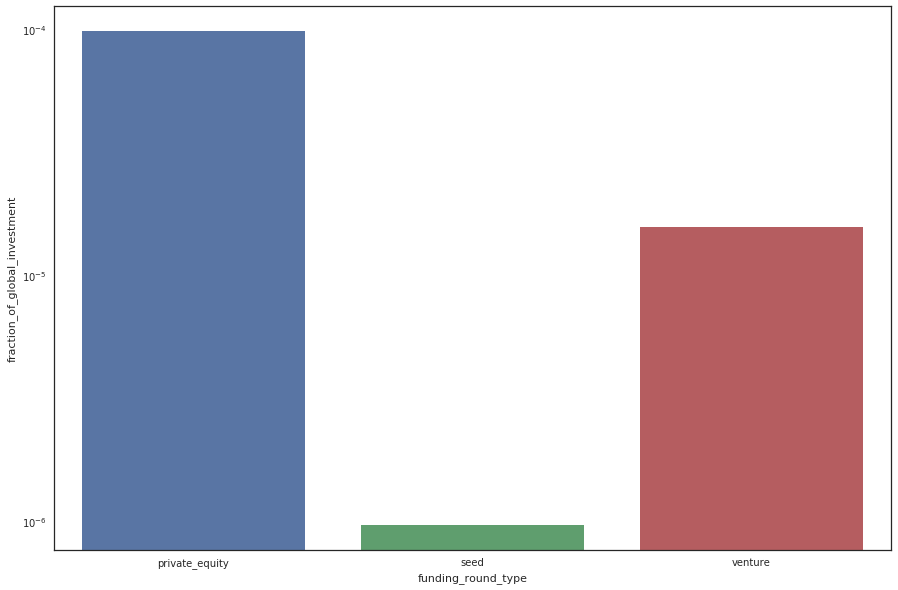

In [115]:
#Plot 1

sns.set(style="white")
plt.figure(figsize=(15, 10))
sns.barplot(x='funding_round_type', y='fraction_of_global_investment', data=filtered_master_frame)
plt.yscale('log')
plt.show()
#private private_equity is at top but venture is best suited

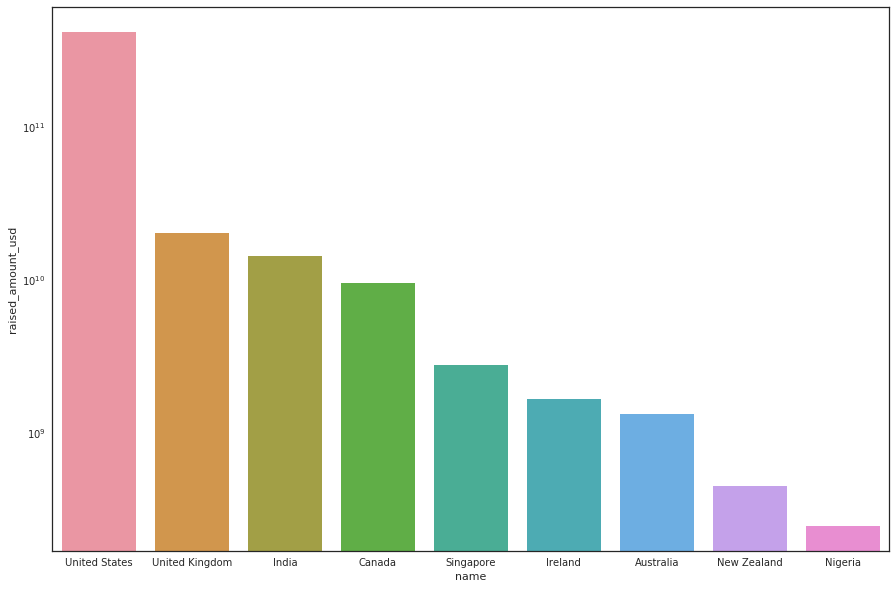

In [116]:

#plot 2
# seaborn theme 
sns.set(style="white")
plt.figure(figsize=(15, 10))
top_nine_countries[["country_code","name","raised_amount_usd"]]
sns.barplot(x='name', y='raised_amount_usd', data=top_nine_countries)
plt.yscale('log')
plt.show()

# A plot showing the top 9 countries against the total amount of investments of
# funding type FT.

In [117]:

top3_usa=D1.sort_values("count", axis=0, ascending=False, inplace=False).head(3)#top sector name no of investment wise
top3_usa=top3_usa[["main_sector","count"]]
top3_usa["country"]="USA"
top3_usa

top3_uk=D2.sort_values("count", axis=0, ascending=False, inplace=False).head(3)
top3_uk=top3_uk[["main_sector","count"]]
top3_uk["country"]="UK"
top3_uk

top3_ind=D3.sort_values("count", axis=0, ascending=False, inplace=False).head(3)
top3_ind=top3_ind[["main_sector","count"]]
top3_ind["country"]="IND"
top3_ind

top3_usa.append(top3_uk)
top3_usa.append(top3_ind)
frames = [top3_usa, top3_uk, top3_ind]
result = pd.concat(frames)



# Dataprepration for  number of investments in the top 3 sectors of the top 3 countries on one chart

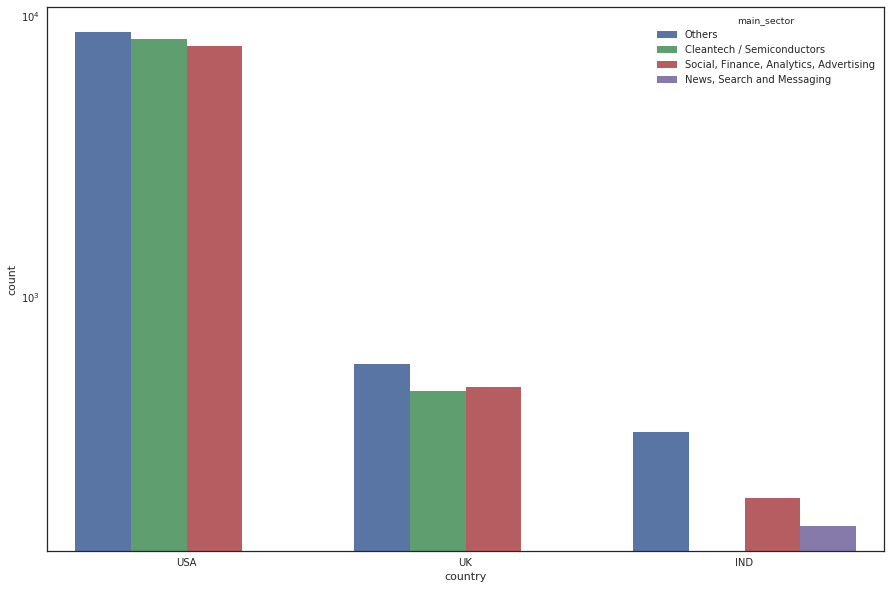

In [118]:
sns.set(style="white")
plt.figure(figsize=(15, 10))
sns.barplot(x="country", y="count", hue="main_sector", data=result);
plt.yscale('log')
plt.show()